# Numerical Differentiation

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Forward, Backward, Central Method of Numerical Diffferentiation

Write a function `my_num_diff(f,a,b,n,option)`, with the input `[df,X]`, where `f` is a function object. The function `my_num_diff(f,a,b,n,option)` should compute the derivative of `f` numerically for `n` even spaced points starting at `a`  and ending at `b` according to the method defined by `option`. The input argument `option` is one of the following  strings: ‘forward’, ‘backward’, ‘central’. Note that for the forward and backward method, the output argument, `dy`, should be an $(n-1)$ 1D array and for the central difference method, `dy` should be an $(n-2)$ 1D array. The function should also output a vector `X` that is the same size as `dy` and denotes the x-values for which `dy` is valid.

In [128]:
def my_num_diff(f,a,b,n,option):
    
    if isinstance(option, str) != True:
        raise Exception("option input must be of type string")
    
    X  = np.linspace(a,b,n)
    dy = np.zeros(len(X))
    
    if option == "forward":
        for j in range(n-1):
            dy[j] = (f(X[j+1])-f(X[j]))/(X[j+1] - X[j])
        return [dy, X]
        
    elif option == "backward":
        for j in range(n-1):
            dy[j] = (f(X[j]) - f(X[j-1]))/(X[j] - X[j-1])
        return [dy, X]
        
    elif option == "central":
        for j in range(n-2):
            dy[j] = (f(X[j+1]) - f(X[j-1]))/(X[j+1] - X[j-1])
        return [dy, X]
        
    else:
        raise valueError("option input is not valid; must be 'forward', 'backward', or 'central'.")
        

**Test cases:**

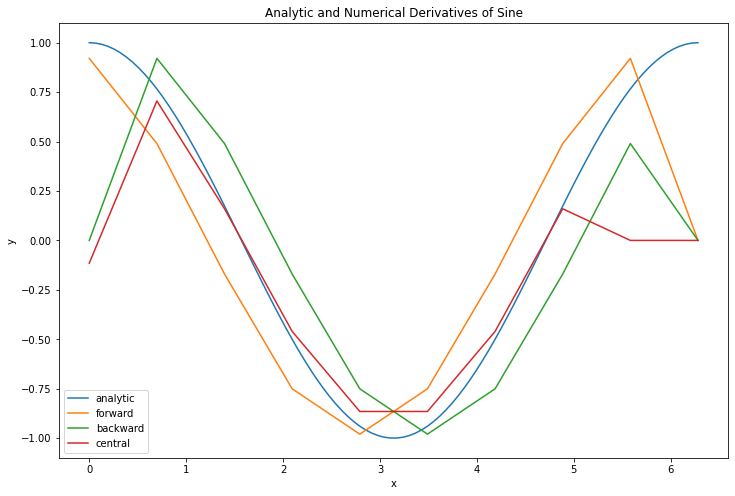

In [129]:
x = np.linspace(0, 2*np.pi, 100)
f = lambda x: np.sin(x)
[dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
[dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
[dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(x), label = 'analytic')
plt.plot(Xf, dyf, label = 'forward')
plt.plot(Xb, dyb, label = 'backward')
plt.plot(Xc, dyc, label = 'central')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

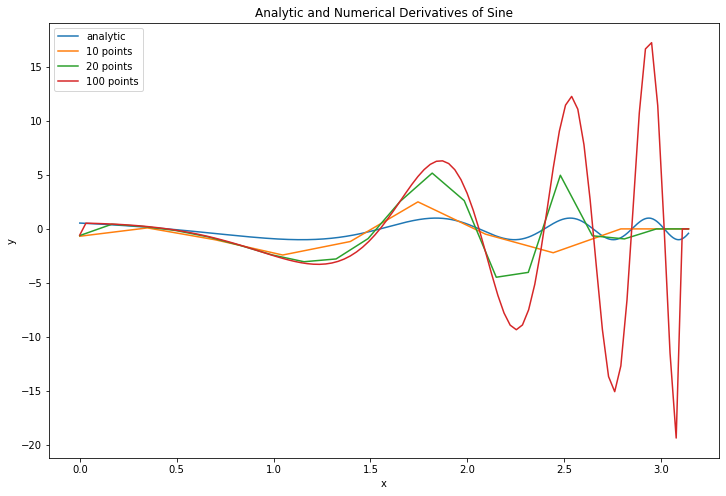

In [218]:
x = np.linspace(0, np.pi, 1000)
f = lambda x: np.sin(np.exp(x))
[dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
[dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
[dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')
plt.figure(figsize = (12, 8))
plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
plt.plot(X10, dy10, label = '10 points')
plt.plot(X20, dy20, label = '20 points')
plt.plot(X100, dy100, label = '100 points')
plt.legend()
plt.title('Analytic and Numerical Derivatives of Sine')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2. Numerical Differentiation with Noise

In [28]:
def my_num_diff_w_smoothing(x,y,n):
    
    if isinstance(n, int) != True:
        raise Exception("input variable n must be of type int")
    elif n < 0:
        raise valueError("n must be positive")
    
    if len(x) != len(y):
        raise Exception("x and y input variables must be of same length")
    
    y_smooth = [0]*len(y)
    dy = [0]*len(y)
        
    for i in range(n,len(y)):
        y_smooth[i] = np.mean(y[i-n:i+n])

    dy = 
    X  = np.linspace(dy[0],dy[-1],len(dy))
    
    return [dy,X]

**Test case:**

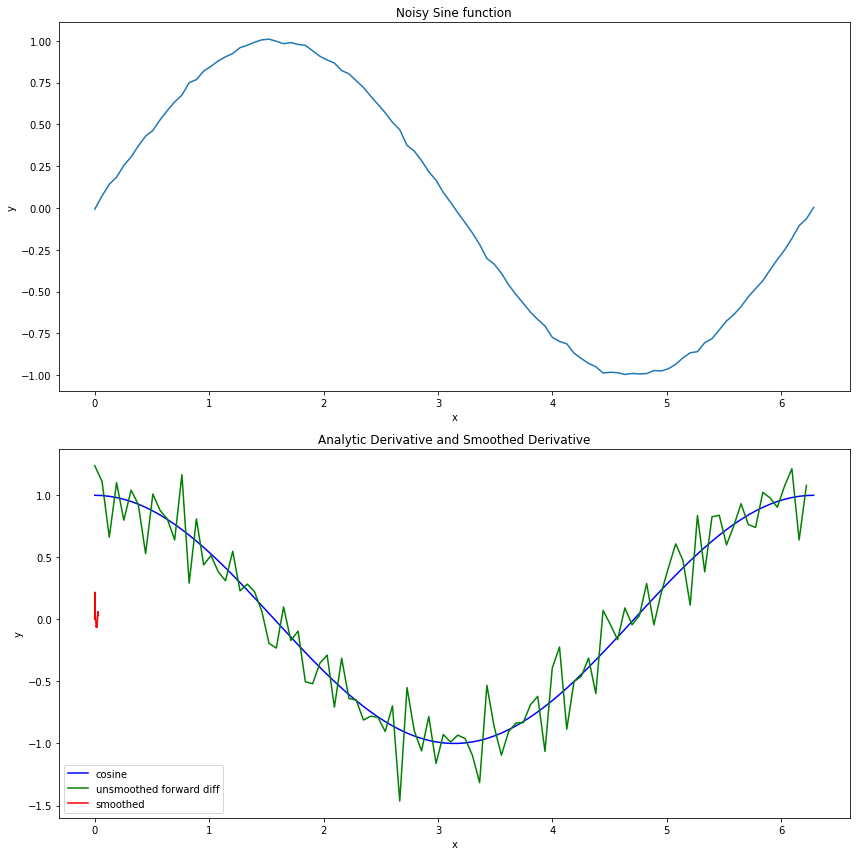

In [30]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
[dy, X] = my_num_diff_w_smoothing(x, y, 4)
plt.figure(figsize = (12, 12))
plt.subplot(211)
plt.plot(x, y)
plt.title('Noisy Sine function')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(212)
plt.plot(x, np.cos(x), 'b', label = 'cosine')
plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', \
    label = 'unsmoothed forward diff')
plt.plot(X, dy, 'r', label = 'smoothed')
plt.title('Analytic Derivative and Smoothed Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()